In [1]:
!python -m pip install -U scikit-learn
!python -m pip install pandas
!python -m pip install matplotlib
!python -m pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


# 1. Data Exploration & Cleaning

In [13]:
df.shape

(8124, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df[df.duplicated()]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [12]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [24]:
# Count 'e' and 'p'
class_counts = df['class'].value_counts().reset_index()
class_counts.columns = ['class', 'count']

# Plot it
fig = px.bar(
    class_counts,
    x='class',
    y='count',
    text='count',
    color='class',
    title='Number of Edible (e) and Poisonous (p) Mushrooms'
)
fig.update_traces(textposition='outside')
fig.show()

In [ ]:
for column in df.columns:
    if column != 'class':
        
        temp = df.groupby([column, 'class']).size().reset_index(name='count')
        
        
        fig = px.bar(
            temp,
            x=column,         
            y='count',        
            color='class',    
            barmode='stack',  
            title=f"Stacked Class Distribution by {column}"
        )
        fig.show()
        

In [27]:
df.to_csv("mushrooms_backup.csv", index=False)

In [30]:
df = pd.read_csv('mushrooms_backup.csv')

In [31]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 1.2 Dropping the feature that are seem to be not important

In [32]:
df = df.drop(columns=["gill-attachment"])

In [34]:
df = df.drop(columns=["veil-type"])

In [35]:
df = df.drop(columns=["stalk-shape"])

In [36]:
df = df.drop(columns=["veil-color"])

In [37]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,c,n,k,e,s,s,w,w,o,p,k,s,u
1,e,x,s,y,t,a,c,b,k,c,s,s,w,w,o,p,n,n,g
2,e,b,s,w,t,l,c,b,n,c,s,s,w,w,o,p,n,n,m
3,p,x,y,w,t,p,c,n,n,e,s,s,w,w,o,p,k,s,u
4,e,x,s,g,f,n,w,b,k,e,s,s,w,w,o,e,n,a,g


# 2.Encoding Categorical Features Using `Label Encoding`

In [ ]:
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns
for column in df.columns:
    if df[column].dtype == 'object': 
        df[column] = label_encoder.fit_transform(df[column])

In [40]:
df.head()   

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,4,3,2,2,7,7,1,4,2,3,5
1,0,5,2,9,1,0,0,0,4,2,2,2,7,7,1,4,3,2,1
2,0,0,2,8,1,3,0,0,5,2,2,2,7,7,1,4,3,2,3
3,1,5,3,8,1,6,0,1,5,3,2,2,7,7,1,4,2,3,5
4,0,5,2,3,0,5,1,0,4,3,2,2,7,7,1,0,3,0,1


In [41]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
8119,0,3,2,4,0,5,0,0,11,0,2,2,5,5,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,11,0,2,2,5,5,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,5,0,2,2,5,5,1,4,0,1,2
8122,1,3,3,4,0,8,0,1,0,0,2,1,7,7,1,0,7,4,2
8123,0,5,2,4,0,5,0,0,11,0,2,2,5,5,1,4,4,1,2


# 3. Split and Training

In [47]:
X = df.drop(columns=["class"])
Y = df["class"]

In [48]:
X.shape, Y.shape

((8124, 18), (8124,))

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape[0]}")
print(f"Testing set size: {x_test.shape[0]}")


test_set_distribution = y_test.value_counts().to_frame("Test set target distribution")
print(test_set_distribution)

train_set_distribution = y_train.value_counts().to_frame("Train set target distribution")
print(train_set_distribution)

Training set size: 6499
Testing set size: 1625
       Test set target distribution
class                              
0                               843
1                               782
       Train set target distribution
class                               
0                               3365
1                               3134


### 3.1 implementing The Model

Train accuracy: 1.00
Test accuracy: 1.00


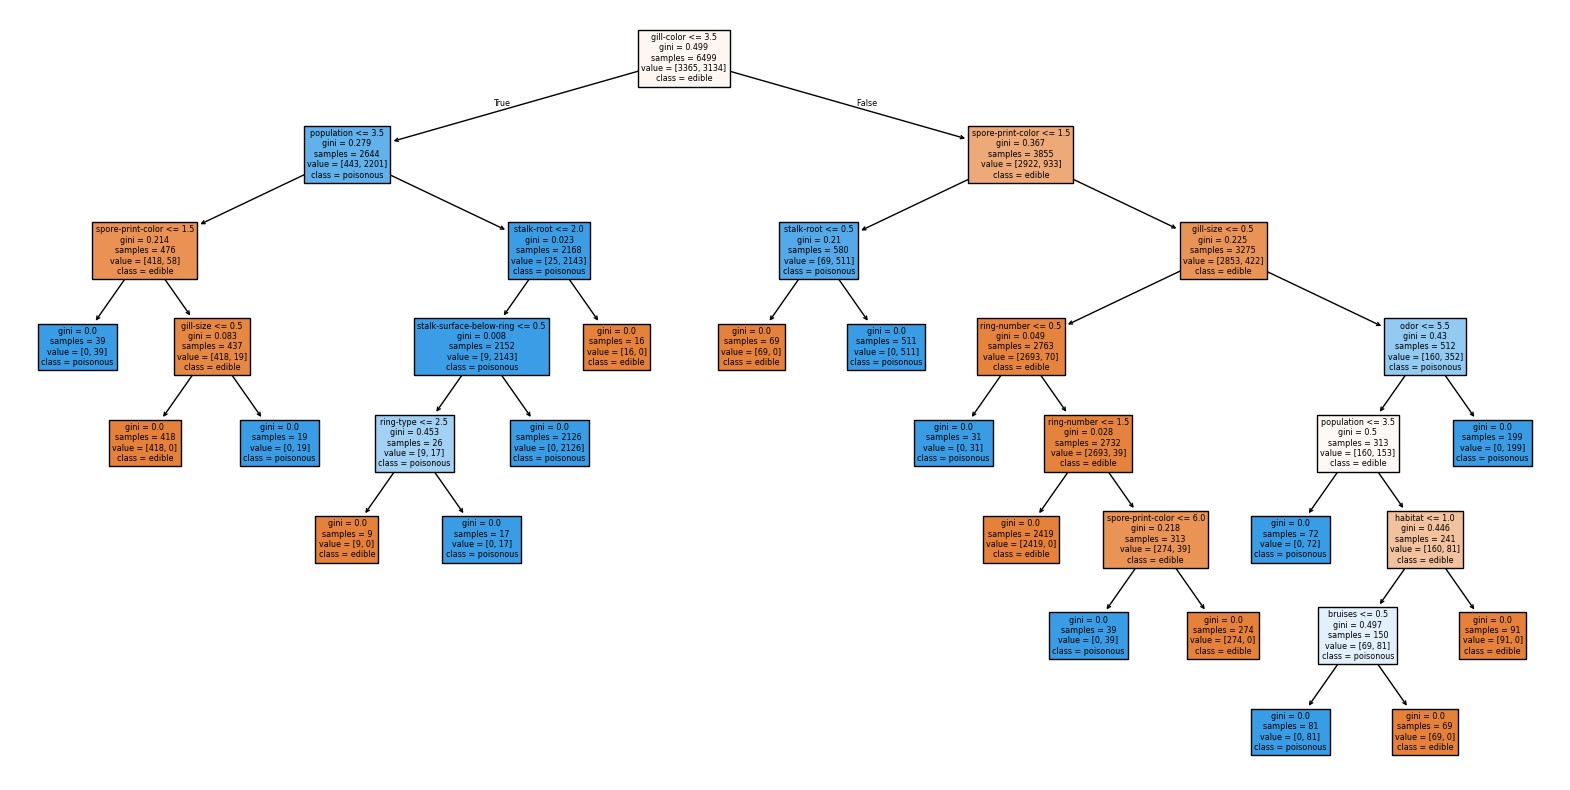

In [54]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# Evaluating the model
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_accuracy = model.score(x_train, y_train_pred)
test_accuracy = model.score(x_test, y_test_pred)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

# Visualizing the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["edible", "poisonous"])
plt.show()

## 3.2 Trying to get The `Feature Importance`, and then drop them to decrease accuracy

                     Feature  Importance
7                 gill-color    0.336926
15         spore-print-color    0.213026
16                population    0.195703
6                  gill-size    0.127917
8                 stalk-root    0.047169
3                    bruises    0.022962
13               ring-number    0.021006
4                       odor    0.019590
17                   habitat    0.010178
14                 ring-type    0.003626
10  stalk-surface-below-ring    0.001897
0                  cap-shape    0.000000
1                cap-surface    0.000000
2                  cap-color    0.000000
9   stalk-surface-above-ring    0.000000
5               gill-spacing    0.000000
12    stalk-color-below-ring    0.000000
11    stalk-color-above-ring    0.000000


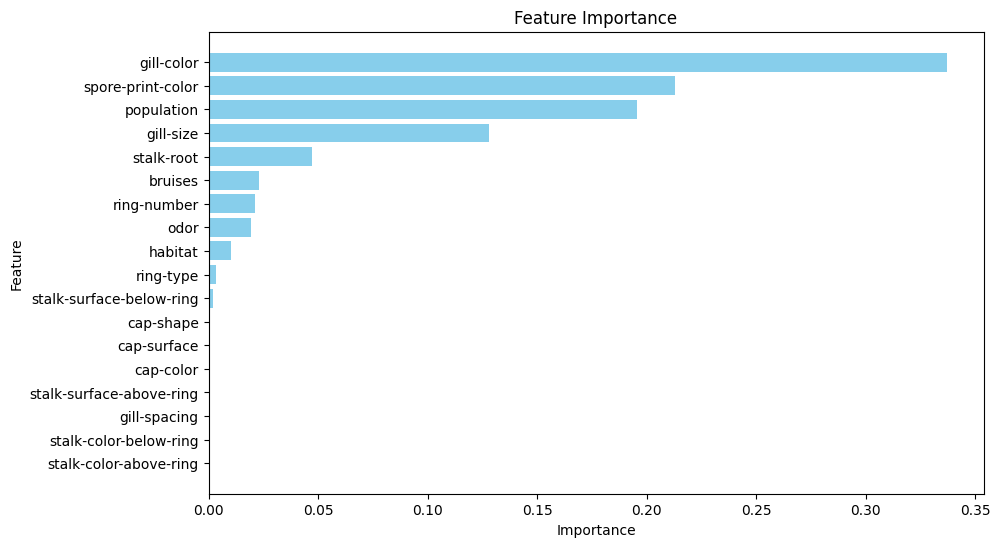

In [63]:
feature_importances = model.feature_importances_

# Storing feature importances in a DataFrame for the visualization only
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

#### Now, we could **drop** `gill-color`, `spore-print-color` and `population`

In [58]:
df = df.drop(columns=["gill-color"])

In [59]:
df = df.drop(columns=["spore-print-color"])

In [60]:
df = df.drop(columns=["population"])

In [61]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,habitat
0,1,5,2,4,1,6,0,1,3,2,2,7,7,1,4,5
1,0,5,2,9,1,0,0,0,2,2,2,7,7,1,4,1
2,0,0,2,8,1,3,0,0,2,2,2,7,7,1,4,3
3,1,5,3,8,1,6,0,1,3,2,2,7,7,1,4,5
4,0,5,2,3,0,5,1,0,3,2,2,7,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,2,2,5,5,1,4,2
8120,0,5,2,4,0,5,0,0,0,2,2,5,5,1,4,2
8121,0,2,2,4,0,5,0,0,0,2,2,5,5,1,4,2
8122,1,3,3,4,0,8,0,1,0,2,1,7,7,1,0,2


Now, we'll try to modeling again to see how much accuracy we'll get. But this time I'll try to do pruned decision tree

Train accuracy (pruned): 1.00
Test accuracy (pruned): 1.00


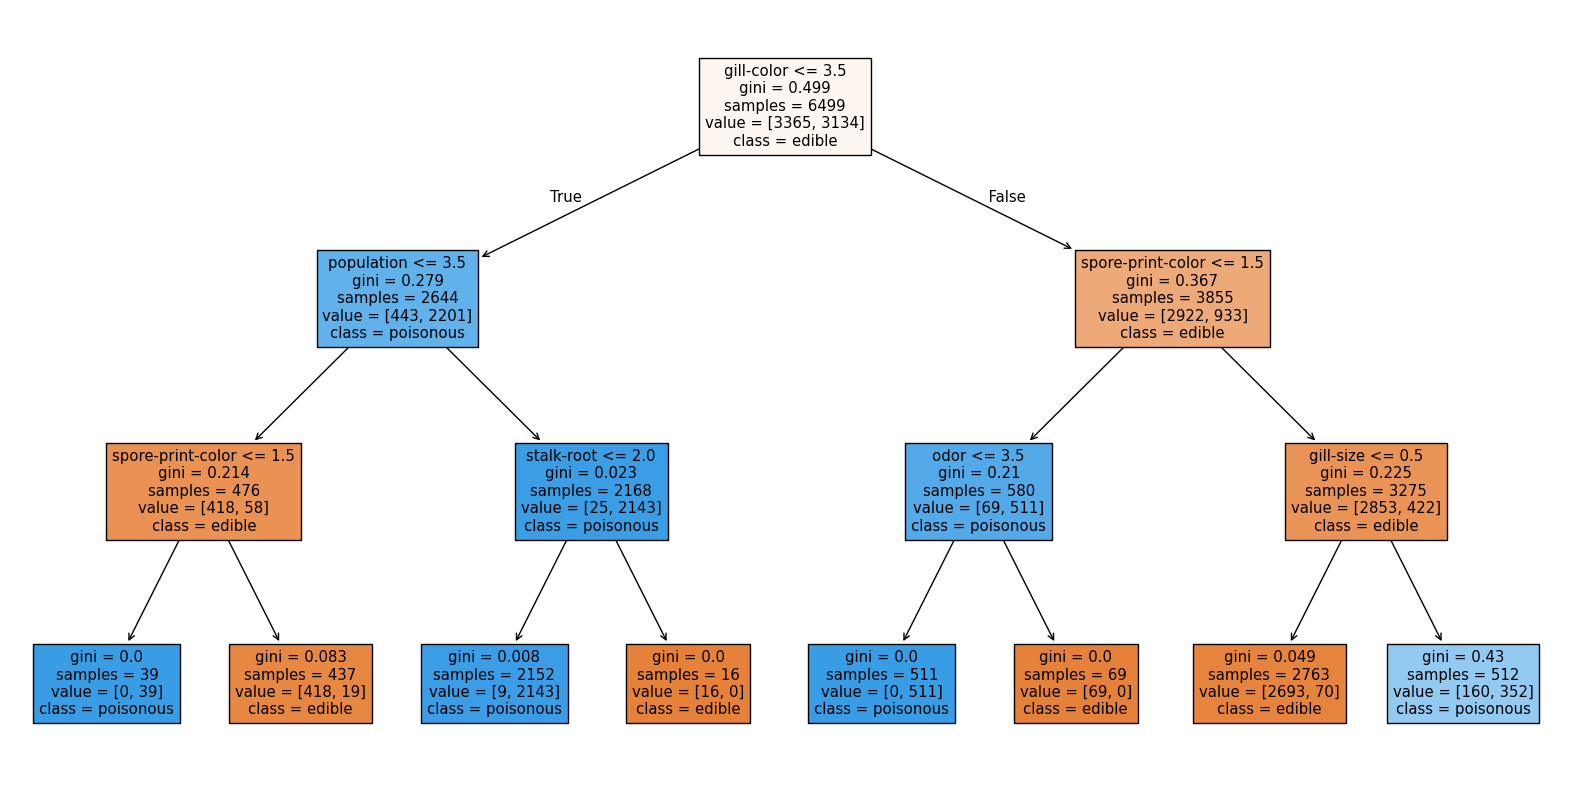

In [65]:
prunedModel = DecisionTreeClassifier(max_depth=3, random_state=42)
prunedModel.fit(x_train, y_train)

# Evaluating the pruned model
y_train_pred = prunedModel.predict(x_train)
y_test_pred = prunedModel.predict(x_test)

training_accuracy_pruned = prunedModel.score(x_train, y_train_pred)
test_accuracy_pruned = prunedModel.score(x_test, y_test_pred)
print(f"Train accuracy (pruned): {training_accuracy_pruned:.2f}")
print(f"Test accuracy (pruned): {test_accuracy_pruned:.2f}")

plt.figure(figsize=(20, 10))
plot_tree(prunedModel, filled=True, feature_names=X.columns, class_names=["edible", "poisonous"])
plt.show()